<a href="https://colab.research.google.com/github/srikavya26/Credit-Default/blob/main/UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

**Credit Default**

**Dataset** :
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Default of Credit Card Clients Dataset (UCI Machine Learning Repository)

**Install Required Libraries**




**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')


**Understanding the Dataset**

In [2]:
df = pd.read_excel('default of credit card clients.xls', sheet_name='Data', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Exploratory Data Analysis**

In [4]:
df.rename(columns={"default payment next month": "default"}, inplace=True)


In [5]:
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

categorical_cols = df.select_dtypes(include=["object"]).columns

if len(categorical_cols) > 0:
    print("\nEncoding categorical columns:", categorical_cols)
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

In [6]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

*Try 70,30 and 60,40 split for training and testing*

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



In [37]:
df = pd.concat([X, y], axis=1)

df.columns = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
    'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
    'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
    'DEFAULT'
]

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Dataset shape: (30000, 24)

First few rows:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24        2        2       -1   
1     120000    2          2         2   26       -1        2        0   
2      90000    2          2         2   34        0        0        0   
3      50000    2          2         1   37        0        0        0   
4      50000    1          2         1   57       -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0            0      

In [38]:
print("\n" + "="*60)
print("Dataset Summary")
print("="*60)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())



Dataset Summary

Data Types:
LIMIT_BAL       int64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
PAY_SEP         int64
PAY_AUG         int64
PAY_JUL         int64
PAY_JUN         int64
PAY_MAY         int64
PAY_APR         int64
BILL_AMT_SEP    int64
BILL_AMT_AUG    int64
BILL_AMT_JUL    int64
BILL_AMT_JUN    int64
BILL_AMT_MAY    int64
BILL_AMT_APR    int64
PAY_AMT_SEP     int64
PAY_AMT_AUG     int64
PAY_AMT_JUL     int64
PAY_AMT_JUN     int64
PAY_AMT_MAY     int64
PAY_AMT_APR     int64
DEFAULT         int64
dtype: object

Missing Values:
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_SEP         0
PAY_AUG         0
PAY_JUL         0
PAY_JUN         0
PAY_MAY         0
PAY_APR         0
BILL_AMT_SEP    0
BILL_AMT_AUG    0
BILL_AMT_JUL    0
BILL_AMT_JUN    0
BILL_AMT_MAY    0
BILL_AMT_APR    0
PAY_AMT_SEP     0
PAY_AMT_AUG     0
PAY_AMT_JUL     0
PAY_AMT_JUN     0
PAY_AMT_MAY     0
PAY_AMT_APR    


PAYMENT HISTORY ANALYSIS


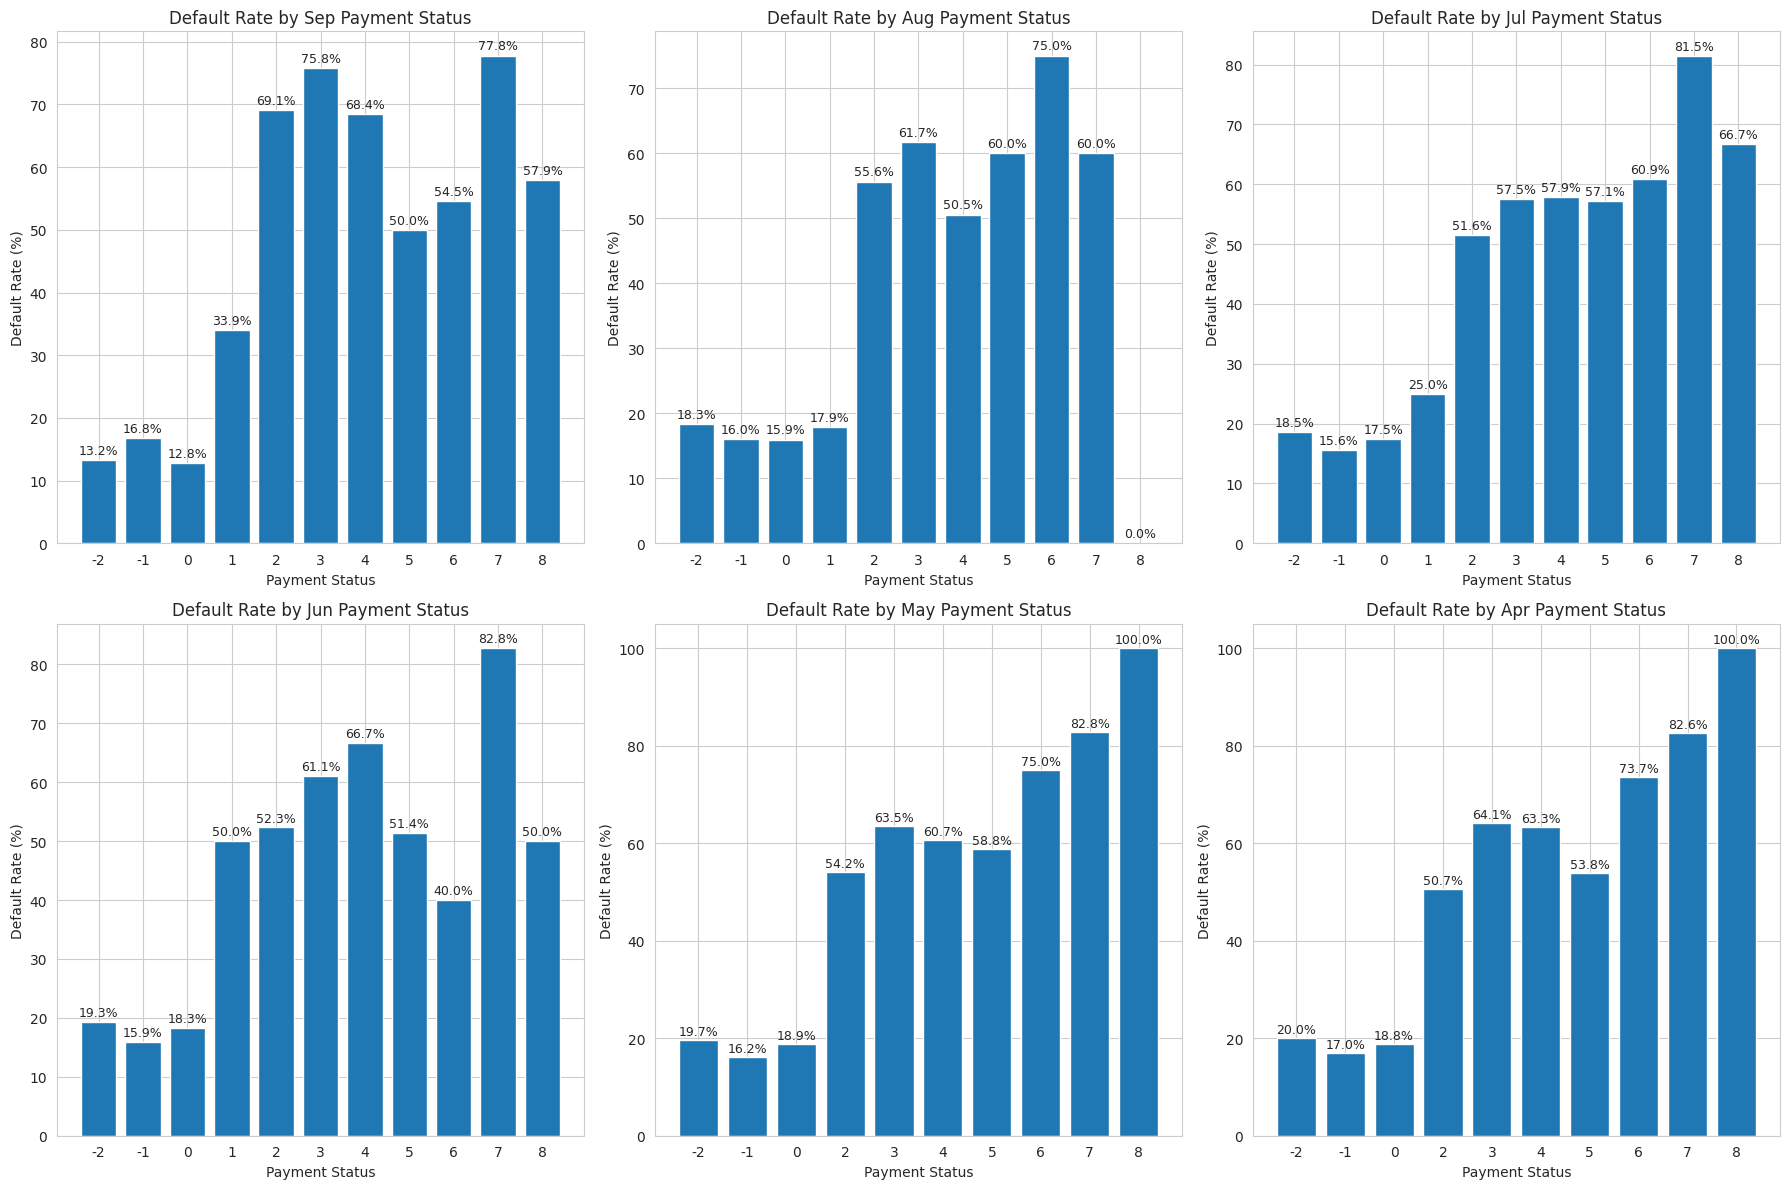

In [39]:
# PAYMENT HISTORY ANALYSIS (Important FEATURES)
print("\n" + "="*60)
print("PAYMENT HISTORY ANALYSIS")
print("="*60)

# Payment status columns
pay_columns = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
months = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (col, month) in enumerate(zip(pay_columns, months)):
    # Calculate default rate by payment status
    pay_default = df.groupby(col)['DEFAULT'].mean()

    axes[i].bar(pay_default.index.astype(str), pay_default.values * 100)
    axes[i].set_title(f'Default Rate by {month} Payment Status')
    axes[i].set_xlabel('Payment Status')
    axes[i].set_ylabel('Default Rate (%)')

    # Add value labels on top of bars
    for j, v in enumerate(pay_default.values):
        axes[i].text(j, v*100 + 1, f'{v:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()



BILL AND PAYMENT AMOUNTS TREND


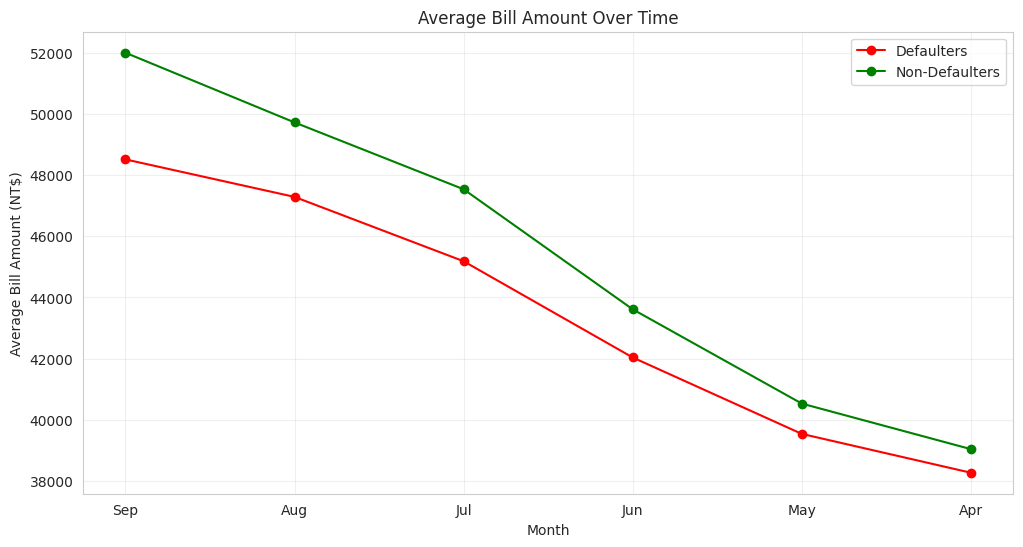

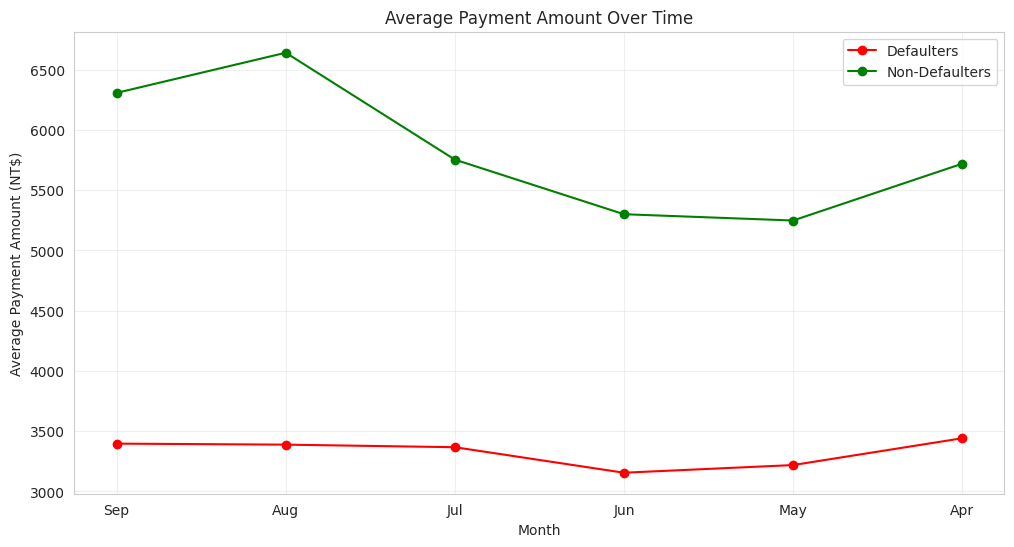

In [40]:
print("\n" + "="*60)
print("BILL AND PAYMENT AMOUNTS TREND")
print("="*60)

# Bill amount columns september to April
bill_cols = ['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
             'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']

# Payment amount columns
pay_amt_cols = ['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Average bill amount over time by default status
avg_bill_default = df[df['DEFAULT']==1][bill_cols].mean()
avg_bill_nondefault = df[df['DEFAULT']==0][bill_cols].mean()

plt.figure(figsize=(12,6))
plt.plot(months, avg_bill_default.values, marker='o', label='Defaulters', color='red')
plt.plot(months, avg_bill_nondefault.values, marker='o', label='Non-Defaulters', color='green')
plt.title('Average Bill Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Bill Amount (NT$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Average payment amount over time by default status
avg_pay_default = df[df['DEFAULT']==1][pay_amt_cols].mean()
avg_pay_nondefault = df[df['DEFAULT']==0][pay_amt_cols].mean()

plt.figure(figsize=(12,6))
plt.plot(months, avg_pay_default.values, marker='o', label='Defaulters', color='red')
plt.plot(months, avg_pay_nondefault.values, marker='o', label='Non-Defaulters', color='green')
plt.title('Average Payment Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Payment Amount (NT$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [43]:
print("\n" + "="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)

# Payment status analysis
print("\nPayment status codes explanation:")
print("-1 = Pay duly, 1 = 1 month delay, 2 = 2 months delay, ...")

# Default rate for critical payment statuses
print("\nDefault rates for critical payment statuses in September (PAY_SEP):")
for status in [-1, 0, 1, 2, 3]:
    count = df[df['PAY_SEP']==status].shape[0]
    default_rate = df[df['PAY_SEP']==status]['DEFAULT'].mean()
    if count > 0:
        print(f"Status {status}: {count} clients, default rate = {default_rate:.1%}")

# Credit limit comparison
avg_limit_default = df[df['DEFAULT']==1]['LIMIT_BAL'].mean()
avg_limit_nondefault = df[df['DEFAULT']==0]['LIMIT_BAL'].mean()
print(f"\nAverage credit limit:")
print(f"  Defaulters: NT${avg_limit_default:,.0f}")
print(f"  Non-defaulters: NT${avg_limit_nondefault:,.0f}")
print(f"  Ratio: {avg_limit_default/avg_limit_nondefault:.2f}")



KEY INSIGHTS SUMMARY

Payment status codes explanation:
-1 = Pay duly, 1 = 1 month delay, 2 = 2 months delay, ...

Default rates for critical payment statuses in September (PAY_SEP):
Status -1: 5686 clients, default rate = 16.8%
Status 0: 14737 clients, default rate = 12.8%
Status 1: 3688 clients, default rate = 33.9%
Status 2: 2667 clients, default rate = 69.1%
Status 3: 322 clients, default rate = 75.8%

Average credit limit:
  Defaulters: NT$130,110
  Non-defaulters: NT$178,100
  Ratio: 0.73


**Model - 1**

*Decision Tree*

In [44]:
decision_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [45]:
decision_tree2 = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=42
)
decision_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [46]:
y_pred = decision_tree2.predict(X_test)


[Text(0.5510204081632653, 0.9285714285714286, 'x[5] <= 1.5\ngini = 0.345\nsamples = 24000\nvalue = [18691, 5309]'),
 Text(0.3086734693877551, 0.7857142857142857, 'x[6] <= 1.5\ngini = 0.277\nsamples = 21506\nvalue = [17935.0, 3571.0]'),
 Text(0.42984693877551017, 0.8571428571428572, 'True  '),
 Text(0.16326530612244897, 0.6428571428571429, 'x[19] <= 565.5\ngini = 0.244\nsamples = 19672\nvalue = [16868, 2804]'),
 Text(0.08163265306122448, 0.5, 'x[11] <= 531.5\ngini = 0.341\nsamples = 5147\nvalue = [4025, 1122]'),
 Text(0.04081632653061224, 0.35714285714285715, 'x[4] <= 45.5\ngini = 0.402\nsamples = 2095\nvalue = [1511, 584]'),
 Text(0.02040816326530612, 0.21428571428571427, 'x[19] <= 0.5\ngini = 0.383\nsamples = 1749\nvalue = [1298, 451]'),
 Text(0.01020408163265306, 0.07142857142857142, 'gini = 0.406\nsamples = 1333\nvalue = [955, 378]'),
 Text(0.030612244897959183, 0.07142857142857142, 'gini = 0.289\nsamples = 416\nvalue = [343, 73]'),
 Text(0.061224489795918366, 0.21428571428571427, '

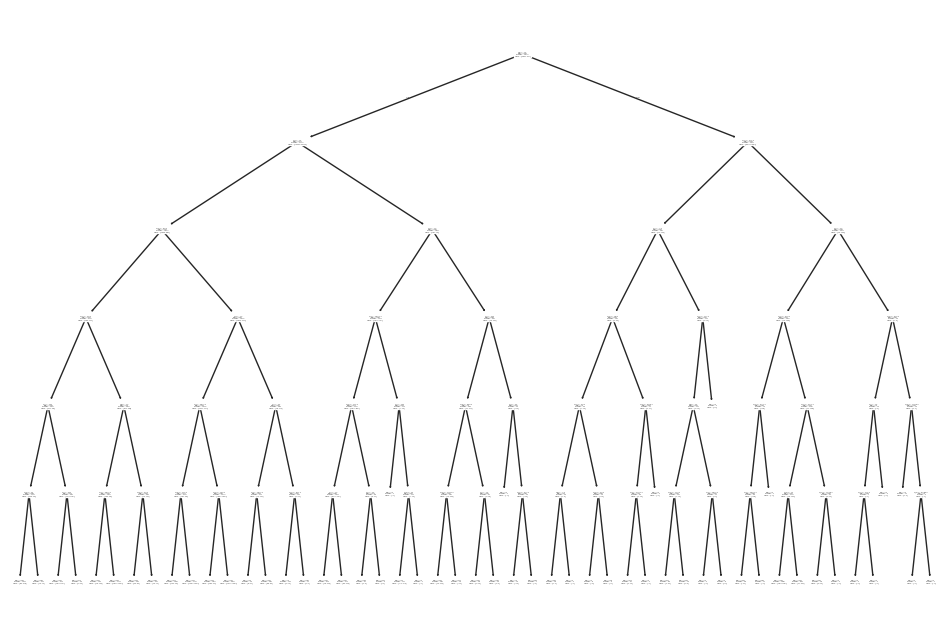

In [47]:
from sklearn.tree import plot_tree
plot_tree(decision_tree2)


*Model-1 Metrics*

In [48]:
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate(decision_tree, X_test, y_test, "Decision Tree")


Decision Tree
Accuracy: 0.7145
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000



In [49]:
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n {name} ")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate(decision_tree2, X_test, y_test, "Decision Tree")


 Decision Tree 
Accuracy: 0.8163333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



**Model - 2**

In [50]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

*Model-2 Metrics*

In [51]:
evaluate(xgb_model, X_test_scaled, y_test, "XGBoost")



 XGBoost 
Accuracy: 0.8175
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



**Model - 3**

In [52]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()


*Model-3 Metrics*



In [53]:
evaluate(nb_model, X_test_scaled, y_test, "Gaussian Naive Bayes")



 Gaussian Naive Bayes 
Accuracy: 0.7525
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4673
           1       0.45      0.55      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.75      0.76      6000



Imbalancee

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: default
0    18691
1     5309
Name: count, dtype: int64
After SMOTE: default
0    18691
1    18691
Name: count, dtype: int64


In [56]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [57]:
evaluate(dt, X_test_scaled, y_test, "Decision Tree with SMOTE")



 Decision Tree with SMOTE 
Accuracy: 0.6991666666666667
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4673
           1       0.36      0.46      0.40      1327

    accuracy                           0.70      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.70      0.71      6000



In [58]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=1,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [59]:
evaluate(xgb, X_test_scaled, y_test, "XGBoost with SMOTE")



 XGBoost with SMOTE 
Accuracy: 0.7981666666666667
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.55      0.47      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



In [60]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 3.520625353173856


In [61]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

In [62]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [63]:
param_dist = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    cv=3,
    scoring="f1",
    n_iter=20,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_scaled, y_train)
best_model = search.best_estimator_

print("\nBest Parameters:")
print(search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters:
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.7}


In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



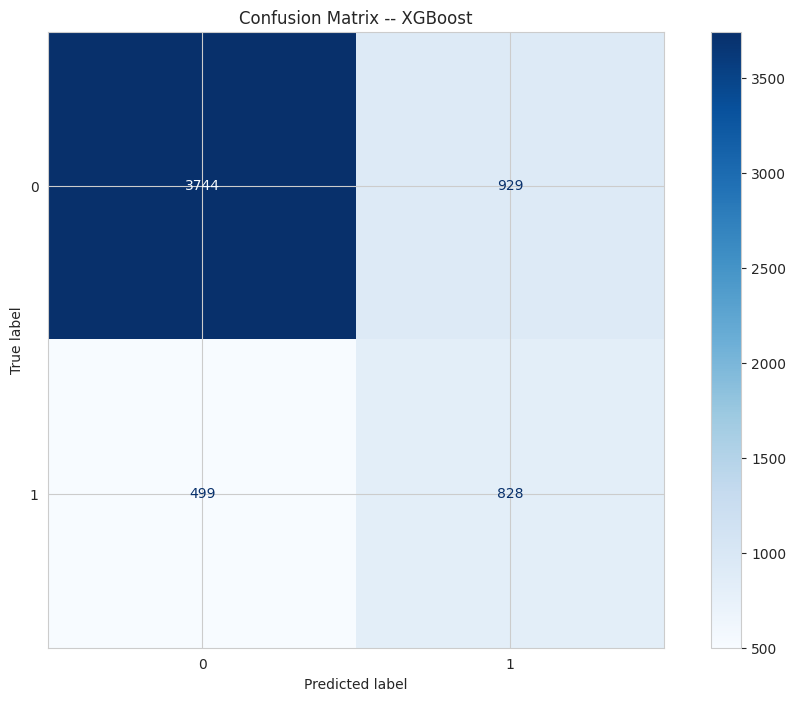

In [65]:
y_pred = best_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix -- XGBoost")
plt.show()


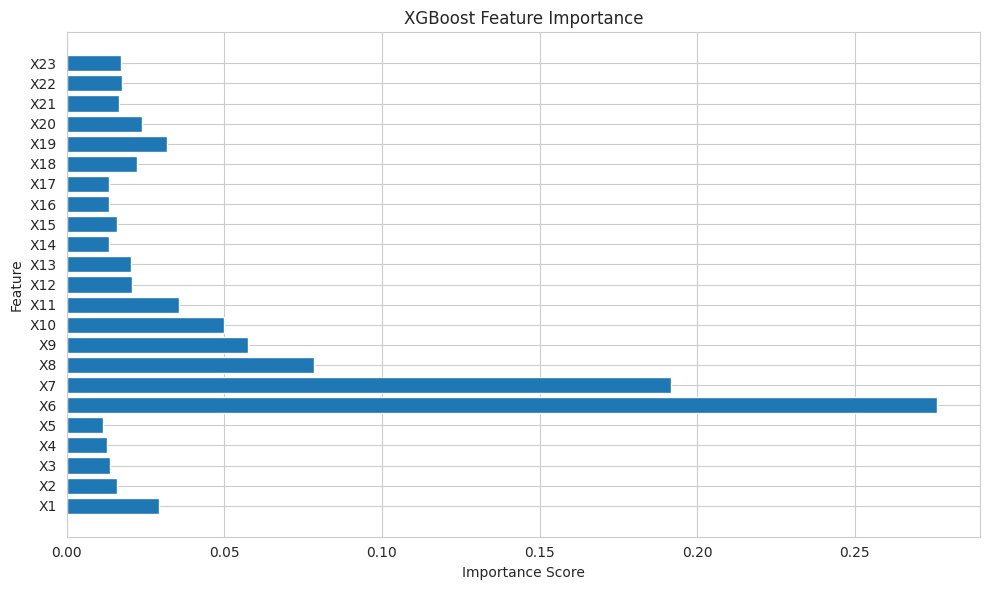

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [67]:
#from sklearn.metrics import average_precision_score, classification_report
#import numpy as np

#y_pred_proba = xgb.predict_proba(X_test)[:, 1]
#pr_auc = average_precision_score(y_test, y_pred_proba)
#print(f"PR-AUC: {pr_auc:.4f}")

#y_pred = xgb.predict(X_test)
#fn_cost = 5 * ((y_test == 1) & (y_pred == 0)).sum()
#fp_cost = 1 * ((y_test == 0) & (y_pred == 1)).sum()
#total_cost = fn_cost + fp_cost
#print(f"Total cost (FN=5, FP=1): {total_cost}")

NotFittedError: need to call fit or load_model beforehand

In [68]:
# Calculate the optimal weight
#neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()

#xgb_tuned = XGBClassifier(
    #n_estimators=300,
    #max_depth=4,
    #learning_rate=0.05,
    #subsample=0.9,
   # colsample_bytree=0.9,
   # scale_pos_weight=neg_pos_ratio,
   # eval_metric="aucpr",
  #  random_state=42

#xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
# Find threshold that maximizes F2-score (weights recall higher)
#from sklearn.metrics import fbeta_score

#thresholds = np.linspace(0.1, 0.5, 50)
#f2_scores = []
#for thresh in thresholds:
    #preds = (y_pred_proba > thresh).astype(int)
    #f2_scores.append(fbeta_score(y_test, preds, beta=2))  # beta=2 emphasizes recall

#best_threshold = thresholds[np.argmax(f2_scores)]
#print(f"Optimal threshold: {best_threshold:.3f}")#

NameError: name 'y_pred_proba' is not defined

**Model - 4**

In [70]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


In [74]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_res.shape[1],)),
    Dropout(0.3),

    Dense(32, activation="relu"),
    Dropout(0.3),

    Dense(16, activation="relu"),

    Dense(1, activation="sigmoid")
])


In [75]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [76]:
history = model.fit(
    X_train_res,
    y_train_res,
    epochs=25,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


Epoch 1/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6201 - loss: 0.6575 - val_accuracy: 0.4525 - val_loss: 0.7432
Epoch 2/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7289 - loss: 0.5869 - val_accuracy: 0.4665 - val_loss: 0.7674
Epoch 3/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7322 - loss: 0.5722 - val_accuracy: 0.4795 - val_loss: 0.7679
Epoch 4/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7373 - loss: 0.5590 - val_accuracy: 0.4694 - val_loss: 0.8030
Epoch 5/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7429 - loss: 0.5536 - val_accuracy: 0.4870 - val_loss: 0.7974
Epoch 6/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7429 - loss: 0.5491 - val_accuracy: 0.4768 - val_loss: 0.7892
Epoch 7/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7440 - loss: 0.5466 - val_accuracy: 0.5046 - val_loss: 0.7978
Epoch 8/25
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7420 - loss: 0.5467 - val_accuracy: 0.

**ANN Metrics**

In [77]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.799
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4673
           1       0.55      0.50      0.52      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



**Model - 5**

*Model-5 Metrics*

#*Evaluating Results*

#Conclusion